In [1]:
import pandas as pd
import seaborn as sns

In [2]:
crime = pd.read_hdf('data/crime.h5')

In [3]:
crime.head(3)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0


In [4]:
wd_counts = crime['REPORTED_DATE'].dt.day_name().value_counts()

In [5]:
wd_counts

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

In [6]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [7]:
title = 'Denver Crimes and Traffic Accidents per Weekday'

In [8]:
wd_counts.reindex(days)

Monday       70024
Tuesday      68394
Wednesday    69538
Thursday     69287
Friday       69621
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

#### Which days use to have more crimes

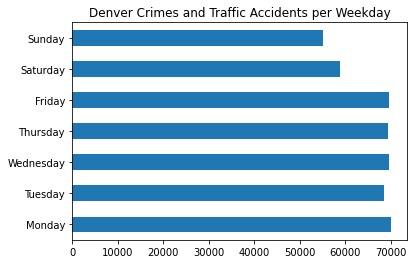

In [9]:
plot = wd_counts.reindex(days).plot(kind='barh', title=title)

In [10]:
year_counts = crime['REPORTED_DATE'].dt.year.value_counts()

In [11]:
year_counts

2016    91076
2015    89148
2014    84421
2017    69702
2013    69527
2012    57037
Name: REPORTED_DATE, dtype: int64

In [12]:
year_counts.sort_index()

2012    57037
2013    69527
2014    84421
2015    89148
2016    91076
2017    69702
Name: REPORTED_DATE, dtype: int64

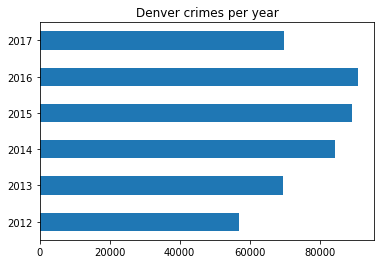

In [13]:
plot = year_counts.sort_index().plot(kind='barh', title='Denver crimes per year')

In [14]:
weekday = crime['REPORTED_DATE'].dt.day_name()

In [15]:
year = crime['REPORTED_DATE'].dt.year

In [16]:
weekday.value_counts()

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

In [17]:
year.value_counts()

2016    91076
2015    89148
2014    84421
2017    69702
2013    69527
2012    57037
Name: REPORTED_DATE, dtype: int64

In [18]:
crime_wd_y = crime.groupby([year, weekday]).size()

In [19]:
crime_wd_y.head(10)

REPORTED_DATE  REPORTED_DATE
2012           Friday            8549
               Monday            8786
               Saturday          7442
               Sunday            7189
               Thursday          8440
               Tuesday           8191
               Wednesday         8440
2013           Friday           10380
               Monday           10627
               Saturday          8875
dtype: int64

In [20]:
crime_table = crime_wd_y.rename_axis(['Year', 'Weekday']).unstack('Weekday')

In [21]:
crime_table.head(10)

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


#### crimes in 2017 per day?

In [22]:
crime_table.loc[2017]

Weekday
Friday       10677
Monday       10638
Saturday      8514
Sunday        8124
Thursday     10545
Tuesday      10628
Wednesday    10576
Name: 2017, dtype: int64

In [23]:
criteria = crime['REPORTED_DATE'].dt.year == 2017

In [24]:
criteria.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: REPORTED_DATE, dtype: bool

In [25]:
crime.loc[criteria, 'REPORTED_DATE'].dt.dayofyear.max()

272

#### getting avg percent of crimes reported for the first given number of days ( example:  first 272)

In [26]:
crime_pct = crime['REPORTED_DATE'].dt.dayofyear.le(272).groupby(year).mean().round(3)

In [27]:
crime_pct

REPORTED_DATE
2012    0.748
2013    0.725
2014    0.751
2015    0.748
2016    0.752
2017    1.000
Name: REPORTED_DATE, dtype: float64

In [28]:
med_pct = crime_pct.loc[2012:2016].median()

In [29]:
crime_table.loc[2017] = crime_table.loc[2017].div(med_pct).astype('int')

In [30]:
crime_table.head(4)

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320


In [31]:
days

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [32]:
crime_table = crime_table.reindex(columns=days)

In [33]:
crime_table

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2012,8786,8191,8440,8440,8549,7442,7189
2013,10627,10416,10354,10431,10380,8875,8444
2014,12813,12440,12948,12309,12683,10950,10278
2015,13452,13381,13320,13512,13273,11586,10624
2016,13708,13338,13900,14050,14059,11467,10554
2017,14221,14208,14139,14097,14274,11382,10860


In [34]:
crime_table.columns

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object', name='Weekday')

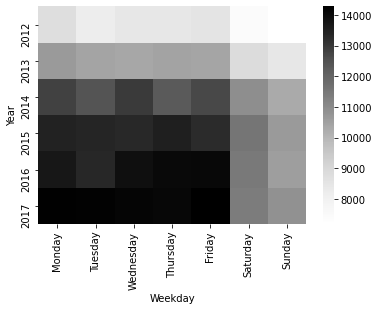

In [35]:
plot=sns.heatmap(crime_table, cmap='Greys')

#### Comparing rising crime with rising polpuation

In [36]:
denver_pop = pd.read_csv('data/denver_pop.csv', index_col='Year')
denver_pop

,Population
Year,
2017,705000
2016,693000
2015,680000
2014,662000
2013,647000
2012,634000


#### normalize the population to 100,000 residents

In [37]:
den_100k = denver_pop.div(100000).squeeze()

#### check the crimes against every 100K population

In [38]:
crime_table_100k = crime_table.div(den_100k, axis='index').astype(int)

In [39]:
crime_table_100k

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2012,1385,1291,1331,1331,1348,1173,1133
2013,1642,1609,1600,1612,1604,1371,1305
2014,1935,1879,1955,1859,1915,1654,1552
2015,1978,1967,1958,1987,1951,1703,1562
2016,1978,1924,2005,2027,2028,1654,1522
2017,2017,2015,2005,1999,2024,1614,1540


plot = sns.heatmap(crime_table_100k, cmap='Greys')

#### plotting the same for given type of crime

In [40]:
def count_crime(df, category):
    df = df[df['OFFENSE_CATEGORY_ID'] == category]
    weekdday = df['REPORTED_DATE'].dt.day_name()
    year = df['REPORTED_DATE'].dt.year
    ct = df.groupby([year, weekday]).size().unstack()
    # refreence taken as 2017
    ct.loc[2017] = ct.loc[2017].div(.748).astype('int')
    
    pop = pd.read_csv('data/denver_pop.csv', index_col='Year')
    pop = pop.squeeze().div(100000)
    ct = ct.div(pop, axis='index').astype('int')
    ct = ct.reindex(columns=days)
    sns.heatmap(ct, cmap='Greys')
    return ct

In [41]:
crime.columns

Index(['OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID', 'REPORTED_DATE', 'GEO_LON',
       'GEO_LAT', 'NEIGHBORHOOD_ID', 'IS_CRIME', 'IS_TRAFFIC'],
      dtype='object')

In [42]:
crime['OFFENSE_CATEGORY_ID'].value_counts()

traffic-accident                125060
all-other-crimes                 72343
public-disorder                  50807
larceny                          48351
theft-from-motor-vehicle         35945
drug-alcohol                     28984
burglary                         26606
auto-theft                       23453
other-crimes-against-persons     21137
aggravated-assault               10961
robbery                           6559
white-collar-crime                6219
sexual-assault                    3615
arson                              602
murder                             269
Name: OFFENSE_CATEGORY_ID, dtype: int64

REPORTED_DATE,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2012,26,35,53,57,43,33,22
2013,100,125,115,112,101,82,61
2014,131,156,169,156,134,92,75
2015,116,143,154,164,132,108,88
2016,115,124,147,173,143,103,69
2017,110,139,160,126,136,101,63


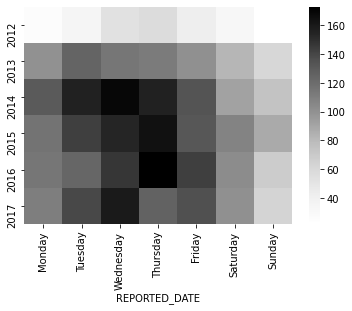

In [43]:
count_crime(crime, 'drug-alcohol')

REPORTED_DATE,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2012,19,23,24,21,21,9,6
2013,20,22,22,21,20,8,4
2014,30,30,28,27,25,11,5
2015,35,40,34,31,28,13,10
2016,29,31,33,32,30,13,8
2017,31,38,35,34,38,14,7


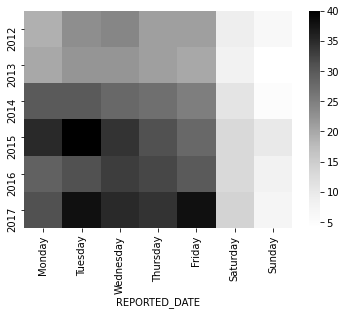

In [44]:
count_crime(crime, 'white-collar-crime')